# **Read in the Data Set:**

In [ ]:
library(readr)
trainingDF <- read.csv("https://raw.githubusercontent.com/CalColistra/IDS/main/Project6/problem2/Loans_Training.csv")
testDF <- read.csv("https://raw.githubusercontent.com/CalColistra/IDS/main/Project6/problem2/Loans_Test.csv")

summary(trainingDF)
head(trainingDF, 10)

  Approval       Debt.to.Income.Ratio   FICO.Score  Request.Amount 
 Mode :logical   Min.   :0.0000       Min.   :371   Min.   :  500  
 FALSE:75066     1st Qu.:0.0900       1st Qu.:647   1st Qu.: 6000  
 TRUE :75236     Median :0.1600       Median :684   Median :11000  
                 Mean   :0.1835       Mean   :672   Mean   :13427  
                 3rd Qu.:0.2400       3rd Qu.:714   3rd Qu.:19000  
                 Max.   :1.0300       Max.   :869   Max.   :44000  
    Interest    
 Min.   :  225  
 1st Qu.: 2700  
 Median : 4950  
 Mean   : 6042  
 3rd Qu.: 8550  
 Max.   :19800  

,Approval,Debt.to.Income.Ratio,FICO.Score,Request.Amount,Interest
,<lgl>,<dbl>,<int>,<int>,<dbl>
1,FALSE,0,397,1000,450
2,FALSE,0,403,500,225
3,FALSE,0,408,1000,450
4,FALSE,0,408,2000,900
5,FALSE,0,411,5000,2250
6,FALSE,0,413,5000,2250
7,FALSE,0,416,6000,2700
8,FALSE,0,421,2000,900
9,FALSE,0,422,12000,5400


In [ ]:
#imports:
library(tidyverse)
install.packages("caret")
library(caret)
library(rpart)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ dplyr   1.0.8
✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ tidyr   1.2.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




# **Examine Training Set:**

In [ ]:
#describe the company dataframe:
dim(trainingDF)

[1] 150302      5

In [ ]:
#examine correlations
correlations <- cor(trainingDF)
correlations

,Approval,Debt.to.Income.Ratio,FICO.Score,Request.Amount,Interest
Approval,1.00000000,-0.26792095,0.54430463,-0.04590285,-0.04590285
Debt.to.Income.Ratio,-0.26792095,1.00000000,-0.07058592,0.12920700,0.12920700
FICO.Score,0.54430463,-0.07058592,1.00000000,0.15391976,0.15391976
Request.Amount,-0.04590285,0.12920700,0.15391976,1.00000000,1.00000000
Interest,-0.04590285,0.12920700,0.15391976,1.00000000,1.00000000


In [ ]:
#check for missing values
cbind(
   lapply(lapply(trainingDF, is.na),sum)
     )

Approval,0
Debt.to.Income.Ratio,0
FICO.Score,0
Request.Amount,0
Interest,0


# **Create a CART model using the training data set that predicts Approval using Debt-to-Income Ratio, FICO Score, etc. Visualize the decision tree and Describe the first few splits in the decision tree**

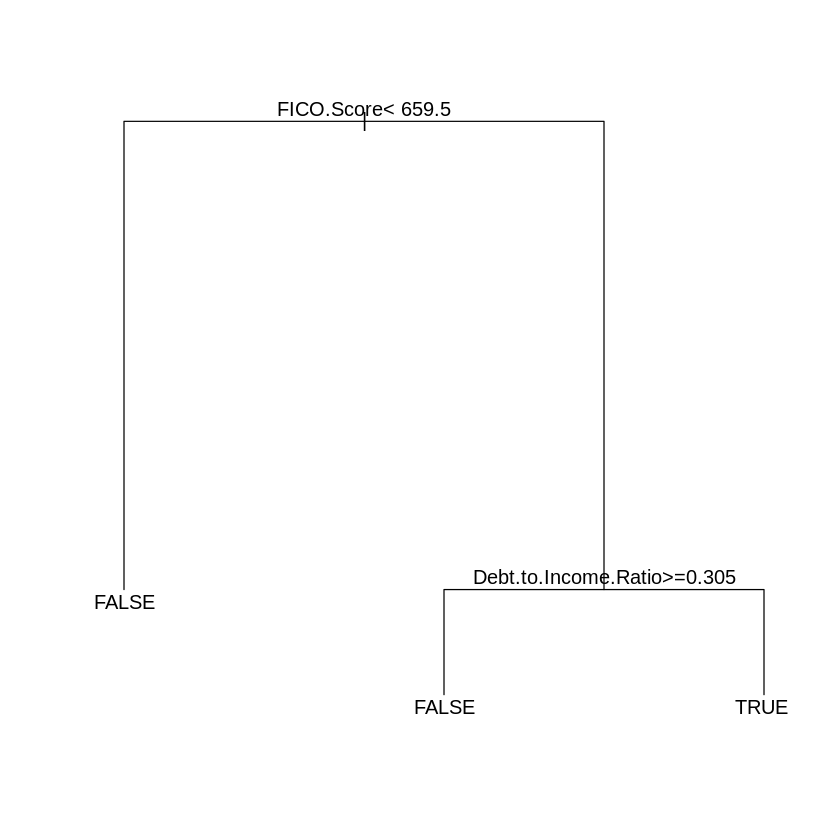

In [ ]:
# grow tree
cart <- rpart(Approval ~ Debt.to.Income.Ratio + FICO.Score + Request.Amount + Interest,
   method="class", data=trainingDF)

par(xpd = NA) # otherwise on some devices the text is clipped
plot(cart)
text(cart, digits = 3)


In [ ]:
print(cart)

n= 150302 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150302 75066 TRUE (0.49943447 0.50056553)  
  2) FICO.Score< 659.5 46002  1808 FALSE (0.96069736 0.03930264) *
  3) FICO.Score>=659.5 104300 30872 TRUE (0.29599233 0.70400767)  
    6) Debt.to.Income.Ratio>=0.305 12873  1679 FALSE (0.86957197 0.13042803) *
    7) Debt.to.Income.Ratio< 0.305 91427 19678 TRUE (0.21523182 0.78476818) *


In [ ]:
summary(cart)

Call:
rpart(formula = Approval ~ Debt.to.Income.Ratio + FICO.Score + 
    Request.Amount + Interest, data = trainingDF, method = "class")
  n= 150302 

         CP nsplit rel error    xerror        xstd
1 0.5646498      0 1.0000000 1.0000000 0.002582313
2 0.1267551      1 0.4353502 0.4353635 0.002130416
3 0.0100000      2 0.3085951 0.3099406 0.001868094

Variable importance
          FICO.Score Debt.to.Income.Ratio 
                  74                   25 

Node number 1: 150302 observations,    complexity param=0.5646498
  predicted class=TRUE   expected loss=0.4994345  P(node) =1
    class counts: 75066 75236
   probabilities: 0.499 0.501 
  left son=2 (46002 obs) right son=3 (104300 obs)
  Primary splits:
      FICO.Score           < 659.5 to the left,  improve=28208.770, (0 missing)
      Debt.to.Income.Ratio < 0.305 to the right, improve= 8986.886, (0 missing)
      Request.Amount       < 25500 to the right, improve= 1191.854, (0 missing)
      Interest             < 11475 to th

The cart model made 150302 obversations.

The model has predicted that those with FICO.Score less than 659.5 will not get approved.  Those who has FICO.Score greater than 659.5 AND Debt.to.Income.Ratio greater than or equal to 0.305 will get approved.

# **Build a C5.0 model using the same predictors and target as in part 1.  This time, specify a minimum of 1000 cases per terminal node. Visualize the decision tree. Describe the first few splits in the decision tree.**

In [ ]:
install.packages("C50")
library(C50)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘libcoin’, ‘mvtnorm’, ‘Formula’, ‘inum’, ‘partykit’, ‘Cubist’




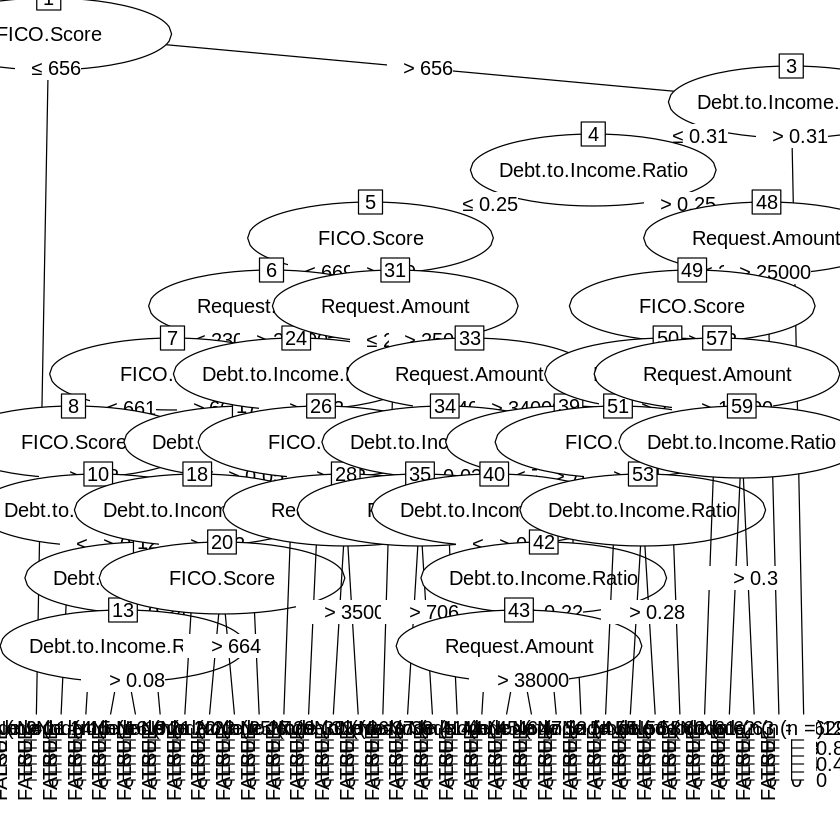

In [ ]:
#factorize the target data:
trainingDF$Approval2 <- factor(trainingDF$Approval)
#build the tree:
c50 <- C5.0(trainingDF[,2:5], trainingDF$Approval2, control = C5.0Control(noGlobalPruning = FALSE))
plot(c50)  #plot tree

In [ ]:
print(c50)


Call:
C5.0.default(x = trainingDF[, 2:5], y = trainingDF$Approval2, control
 = C5.0Control(noGlobalPruning = FALSE))

Classification Tree
Number of samples: 150302 
Number of predictors: 4 

Tree size: 32 

Non-standard options: attempt to group attributes



In [ ]:
summary(c50)


Call:
C5.0.default(x = trainingDF[, 2:5], y = trainingDF$Approval2, control
 = C5.0Control(noGlobalPruning = FALSE))


C5.0 [Release 2.07 GPL Edition]  	Mon Apr 18 17:27:32 2022
-------------------------------

Class specified by attribute `outcome'

Read 150302 cases (5 attributes) from undefined.data

Decision tree:

FICO.Score <= 656: FALSE (43749/1090)
FICO.Score > 656:
:...Debt.to.Income.Ratio > 0.31: FALSE (12077/1147)
    Debt.to.Income.Ratio <= 0.31:
    :...Debt.to.Income.Ratio > 0.25:
        :...Request.Amount > 25000: FALSE (1629/488)
        :   Request.Amount <= 25000:
        :   :...FICO.Score > 672:
        :       :...Request.Amount <= 19000: TRUE (5523/1925)
        :       :   Request.Amount > 19000:
        :       :   :...Debt.to.Income.Ratio <= 0.3: TRUE (1084/466)
        :       :       Debt.to.Income.Ratio > 0.3: FALSE (172/65)
        :       FICO.Score <= 672:
        :       :...Request.Amount > 22000: FALSE (93/22)
        :           Request.Amount <= 22

The c5.0 model made 150302 observations. 

The first node decides that those who have FICO.Score <= 656 will not get approved.  Those who have (FICO.Score > 656) AND (Debt.to.Income.Ratio <= 0.31) will get approved.  But, those who have (FICO.Score > 656) AND (Debt.to.Income.Ratio > 0.31) will not get approved. 

# **How does your C5.0 model compare to your CART model for the loans_training data? Describe the similarities and differences.**

The root node for both trees are similar because they used FICO.Score to determine the first decision.  Both used a similar value too ((CART used FICO.Score < 659.5) and (C5.0 used  FICO.Score < 656).  

The second node is also very similar between the two trees.  They both decide based on Debt.to.Income.Ratio at around .3.

Both decision trees made the same amount of observations: 150302.

# References:
- http://www.sthda.com/english/articles/35-statistical-machine-learning-essentials/141-cart-model-decision-tree-essentials/
- https://rpubs.com/genedalusong/507534
